In [27]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('Scipy: {}'.format(scipy.__version__))
import numpy
print('Numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('Pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.4.1
Numpy: 1.18.1
matplotlib: 3.1.3
Pandas: 1.0.1
sklearn: 0.22.1


In [28]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection 
from sklearn.ensemble import VotingClassifier

In [29]:
#loading the data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"


In [30]:
names = ['sepal-length','sepal-width','petal-length','class']
dataset = read_csv(url,names=names)

In [31]:
#dimensions of the dataset
print(dataset.shape)


(150, 4)


In [32]:
#take a peek at the data
print(dataset.head(20))

     sepal-length  sepal-width  petal-length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa
5.4           3.9          1.7           0.4  Iris-setosa
4.6           3.4          1.4           0.3  Iris-setosa
5.0           3.4          1.5           0.2  Iris-setosa
4.4           2.9          1.4           0.2  Iris-setosa
4.9           3.1          1.5           0.1  Iris-setosa
5.4           3.7          1.5           0.2  Iris-setosa
4.8           3.4          1.6           0.2  Iris-setosa
4.8           3.0          1.4           0.1  Iris-setosa
4.3           3.0          1.1           0.1  Iris-setosa
5.8           4.0          1.2           0.2  Iris-setosa
5.7           4.4          1.5           0.4  Iris-setosa
5.4           

In [33]:
#statistical summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length
count    150.000000   150.000000    150.000000
mean       3.054000     3.758667      1.198667
std        0.433594     1.764420      0.763161
min        2.000000     1.000000      0.100000
25%        2.800000     1.600000      0.300000
50%        3.000000     4.350000      1.300000
75%        3.300000     5.100000      1.800000
max        4.400000     6.900000      2.500000


In [34]:
#class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


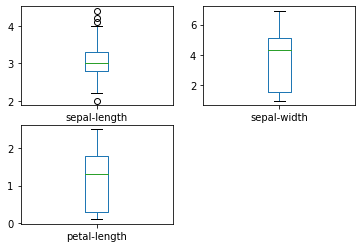

In [35]:
#visualize the data
#univariate plots - box and whisker plot
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

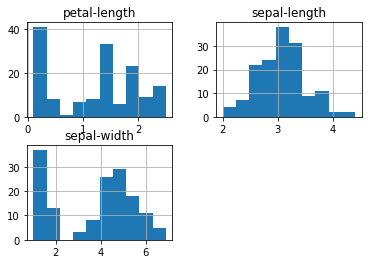

In [36]:
#hostogram of all variables
dataset.hist()
pyplot.show()


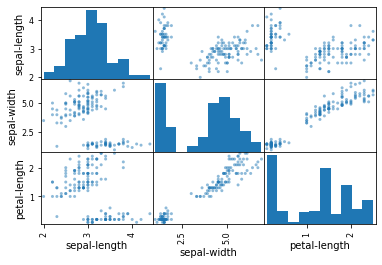

In [37]:
#multivariate plots
scatter_matrix(dataset)
pyplot.show()

In [49]:
#creating a validation set
#splitting dataset
array = dataset.values
X = array[:, 0:3]
y = array[:, 3]
X_train, X_validation,Y_train, Y_validation = train_test_split(X,y,test_size=0.2, random_state=1)

In [50]:
#Logostic Regression
#Linear Discriminant analysis
#N-nearest neighbors
#classification and regression trees
#gaussian naive bayes
#support vector machine

#building models
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))


In [51]:
#evaluated the created models
results = []
names = []
for name,model in models:
    kfold = StratifiedKFold(n_splits=10,random_state = 1,shuffle = True)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR: 0.933333 (0.062361)
LDA: 0.966667 (0.040825)
KNN: 0.958333 (0.041667)
NB: 0.958333 (0.041667)
SVM: 0.966667 (0.040825)


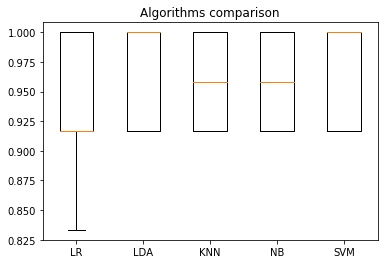

In [52]:
#compare our models
pyplot.boxplot(results,labels=names)
pyplot.title('Algorithms comparison')
pyplot.show()

In [53]:
#make prediction svm
model = SVC(gamma='auto')
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [56]:
#evaluate our predictions
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

